In [ ]:
# Copyright 2023 Regeneron Pharmaceuticals Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### Plotting the banchmarking results of TCR clustering

In [1]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import seaborn as sns

import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

### Load in collated clustering results

 - for example of how to perform TCR-VALID clustering and scoring see 'cluster_tcr_example.ipynb'
 - clustering scores were calculated for other methods using the same scoring function and included in these results
 - results data not co-packed with the model - path to data below must be to the exact location of this file on your system (i.e if you move the notebook to another location, change the path below)

In [2]:
pl_df = pd.read_csv('../results_data/comparison_scores_221012.csv')

In [3]:
colorblind = sns.color_palette("muted", 10)
method_colors = {
    'tcrdist' : colorblind[0],
    'tcr-bert': colorblind[0],
    'ESM': colorblind[1],
    'ismart': colorblind[1],
    'TCR-VALID':colorblind[2]
}


## Comparisons of TCR-Antigen clustering for transformer based models

#### Select the appropriate comparisons
 - compare TRB models here since all models have TRB option
     - note that performance is better when use TRA and TRB ('feature'=='TR')
 - Although these models use different types of input (CDR3, CDR2+CDR3) we can still compare them

In [4]:
TCR_BERT=pl_df[(pl_df['chains']=='TRB') &
                    (pl_df['minsize']==3) &
                    (pl_df['flu_included']==True) &
                    (pl_df['sources']=='both') &
                    (pl_df['method']=='tcr-bert') &
                    (pl_df.feature=='CDR3')
                ]
ESM=pl_df[(pl_df['chains']=='TRB') &
                    (pl_df['minsize']==3) &
                    (pl_df['flu_included']==True) &
                    (pl_df['sources']=='both') &
                    (pl_df['method']=='ESM') &
                    (pl_df.feature=='CDR23')&
                    (pl_df['epsilon']<3)
                ]
TCR_VALID=pl_df[(pl_df['chains']=='TRB') &
                    (pl_df['minsize']==3) &
                    (pl_df['flu_included']==True) &
                    (pl_df['sources']=='both') &
                    (pl_df['method']=='TCR-VALID') &
                    (pl_df.feature=='CDR23')
                ]


In [5]:
TCR_BERT['epsilon_scaled'] = (TCR_BERT['epsilon'] - TCR_BERT['epsilon'].min()) / (TCR_BERT['epsilon'].max() - TCR_BERT['epsilon'].min())
ESM['epsilon_scaled'] = (ESM['epsilon'] - ESM['epsilon'].min()) / (ESM['epsilon'].max() - ESM['epsilon'].min())
TCR_VALID['epsilon_scaled'] = (TCR_VALID['epsilon'] - TCR_VALID['epsilon'].min()) / (TCR_VALID['epsilon'].max() - TCR_VALID['epsilon'].min())

/tmp/ipykernel_29158/2960548114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TCR_BERT['epsilon_scaled'] = (TCR_BERT['epsilon'] - TCR_BERT['epsilon'].min()) / (TCR_BERT['epsilon'].max() - TCR_BERT['epsilon'].min())
/tmp/ipykernel_29158/2960548114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESM['epsilon_scaled'] = (ESM['epsilon'] - ESM['epsilon'].min()) / (ESM['epsilon'].max() - ESM['epsilon'].min())
/tmp/ipykernel_29158/2960548114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [6]:
concatenated_transformer = pd.concat([TCR_BERT.assign(Method = 'TCR BERT CDR3only'), ESM.assign(Method = 'ESM'),TCR_VALID.assign(Method = 'TCR_VALID')])

/tmp/ipykernel_29158/3215528200.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2.set_yticklabels(axes2.get_yticks(), size = 12)
/tmp/ipykernel_29158/3215528200.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2.set_xticklabels(axes2.get_xticks(), size = 12)


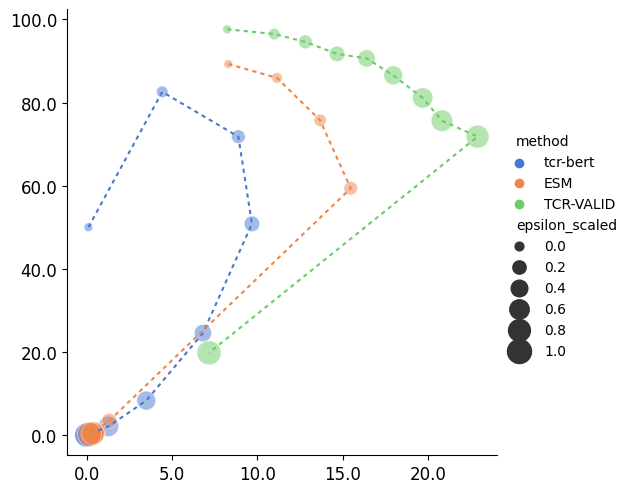

In [7]:
plotting_df=concatenated_transformer
axes=sns.relplot(x='c-CSI', y='c-precision', hue='method', size='epsilon_scaled',sizes=(40, 300), alpha=.5, palette=method_colors, data=plotting_df,legend='brief')
axes2=sns.lineplot(x = 'c-CSI', y = 'c-precision', data = plotting_df, hue='method',sort=False,style=True,dashes=[(2, 2)],palette=method_colors,)
axes2.legend().remove()
axes2.set(xlabel=None)

axes2.set(ylabel=None)
axes2.set_yticklabels(axes2.get_yticks(), size = 12)
axes2.set_xticklabels(axes2.get_xticks(), size = 12)

fig = axes.fig


## Comparisons of TCR-Antigen clustering for sequence based models

#### Select the appropriate comparisons
 - compare TRB models here since all models have TRB option
     - note that performance is better when use TRA and TRB ('feature'=='TR')
 - Although these models use different types of input (CDR2+CDR3, CDR1+CDR2+CDR3) we can still compare them

In [8]:
tcrdist=pl_df[(pl_df['chains']=='TRB') &
                    (pl_df['minsize']==3) &
                    (pl_df['flu_included']==True) &
                    (pl_df['sources']=='both') &
                    (pl_df['method']=='tcrdist') &
                    (pl_df.feature=='CDR123')
                ]

ismart=pl_df[(pl_df['chains']=='TRB') &
                    (pl_df['minsize']==3) &
                    (pl_df['flu_included']==True) &
                    (pl_df['sources']=='both') &
                    (pl_df['method']=='ismart') &
                    (pl_df.feature=='CDR123')
                ]
TCR_VALID=pl_df[(pl_df['chains']=='TRB') &
                    (pl_df['minsize']==3) &
                    (pl_df['flu_included']==True) &
                    (pl_df['sources']=='both') &
                    (pl_df['method']=='TCR-VALID') &
                    (pl_df.feature=='CDR23')
                ]
tcrdist['epsilon_scaled'] = (tcrdist['epsilon'] - tcrdist['epsilon'].min()) / (tcrdist['epsilon'].max() - tcrdist['epsilon'].min())
ismart['epsilon_scaled'] = (ismart['epsilon'] - ismart['epsilon'].min()) / (ismart['epsilon'].max() - ismart['epsilon'].min())
TCR_VALID['epsilon_scaled'] = (TCR_VALID['epsilon'] - TCR_VALID['epsilon'].min()) / (TCR_VALID['epsilon'].max() - TCR_VALID['epsilon'].min())


/tmp/ipykernel_29158/3824479397.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcrdist['epsilon_scaled'] = (tcrdist['epsilon'] - tcrdist['epsilon'].min()) / (tcrdist['epsilon'].max() - tcrdist['epsilon'].min())
/tmp/ipykernel_29158/3824479397.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ismart['epsilon_scaled'] = (ismart['epsilon'] - ismart['epsilon'].min()) / (ismart['epsilon'].max() - ismart['epsilon'].min())
/tmp/ipykernel_29158/3824479397.py:25: SettingWithCopyWarning: 
A value is trying t

In [9]:
concatenated_sequence = pd.concat([tcrdist.assign(dataset = 'tcrdist'), ismart.assign(dataset = 'ismart'),TCR_VALID.assign(dataset = 'TCR-VALID')])

/tmp/ipykernel_29158/1506320940.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2.set_yticklabels(axes2.get_yticks(), size = 12)
/tmp/ipykernel_29158/1506320940.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes2.set_xticklabels(axes2.get_xticks(), size = 12)


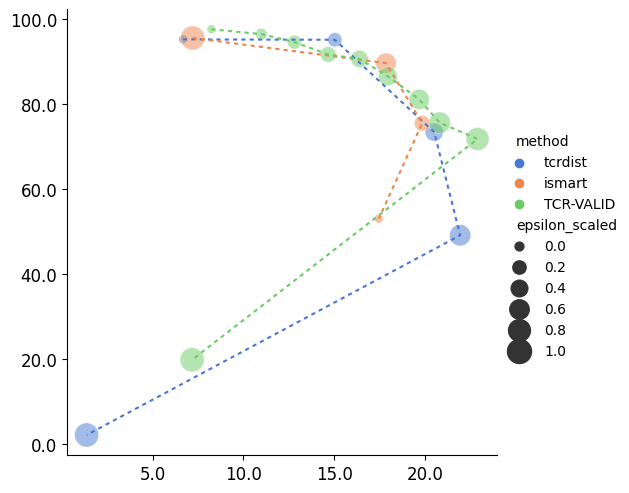

In [10]:
plotting_df=concatenated_sequence
axes=sns.relplot(x='c-CSI', y='c-precision', hue='method', size='epsilon_scaled',sizes=(40, 300), alpha=.5, palette=method_colors, data=plotting_df,legend='brief')
axes2=sns.lineplot(x = 'c-CSI', y = 'c-precision', data = plotting_df, hue='method',sort=False,style=True,dashes=[(2, 2)],palette=method_colors,)
axes2.legend().remove()
axes2.set(xlabel=None)

axes2.set(ylabel=None)
axes2.set_yticklabels(axes2.get_yticks(), size = 12)
axes2.set_xticklabels(axes2.get_xticks(), size = 12)

fig = axes.fig


## plot comparison split into different input features and chains

In [16]:
plot_df = pl_df[
    ((pl_df['method'].isin(['ESM','tcr-bert_original','tcr-bert'])) & (pl_df['mean_features']==True)) |
    (~(pl_df['method'].isin(['ESM','tcr-bert_original','tcr-bert'])) & (pl_df['mean_features']==False))
]
plot_df = plot_df[plot_df['method']!='tcr-bert_original']

In [17]:
method_colors = {
    'tcrdist' : 'steelblue',
    'tcrdist_original' : 'orange',
    'tcr-bert': 'm',
    'physico' : 'r',
    'ismart': 'b',
    'ESM': 'c',
    'TCR-VALID':'k'
}

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=name,
          markerfacecolor=col, markersize=6)
    for name,col in method_colors.items()
]

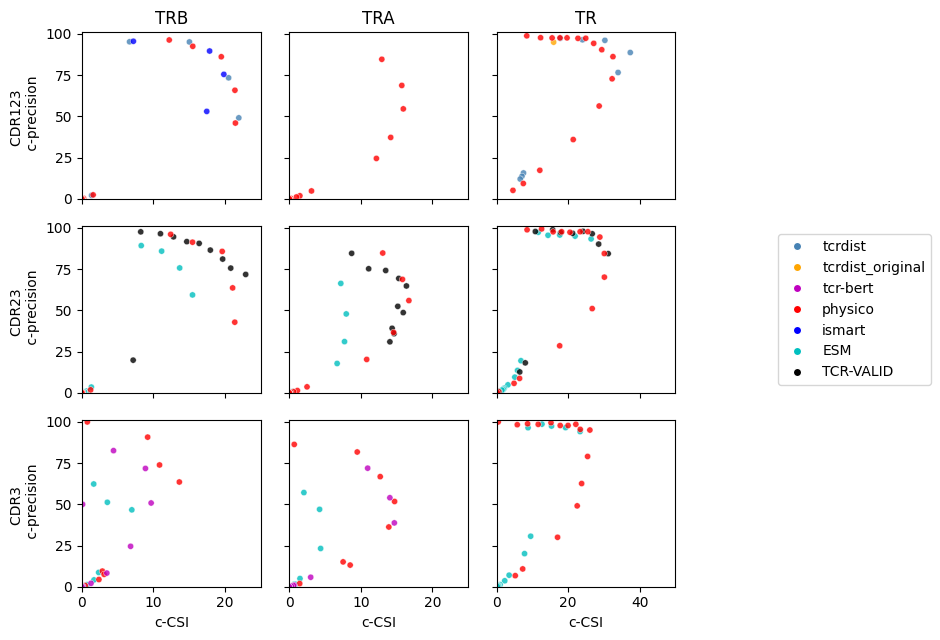

In [18]:
# sizing for pdf
# f,axes = plt.subplots(3,3,figsize=(5,3.5))
# size=6
# sizing or NB
f,axes = plt.subplots(3,3,figsize=(10,6.5))
size=20

chain_ = ['TRB','TRA','TR']
features_ = ['CDR123','CDR23','CDR3']

xlims = [25,25,50]

for i, sax in enumerate(axes):
    for j, ax in enumerate(sax):
        g = sns.scatterplot(
            data=plot_df[
                (plot_df['chains']==chain_[j]) &
                (plot_df['minsize']==3) &
                (plot_df['flu_included']==True) &
                (plot_df['sources']=='both') &
                (plot_df['method']!='physicochemical_PCA16') &
                (plot_df.feature==features_[i])
            ],
            x='c-CSI',
            y='c-precision',
            hue='method',
            palette=method_colors,
            s=size,
            alpha=0.8,
            ax = ax
        )
        g.legend().remove()
        ax.set_xlim([0,xlims[j]])
        ax.set_ylim([0,101])
        if j>0:
            ax.set_ylabel('')
            ax.set_yticklabels([])
        else:
            ax.set_ylabel('{} \n c-precision'.format(
                features_[i]
            ))
        if i!=2:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        if i==0:
            ax.set_title(chain_[j])
        if i==1 and j==2:
            ax.legend(
                handles=legend_elements,
                loc='center',
                bbox_to_anchor=(2, 0.5)
            )
plt.tight_layout()